In [22]:
# Celda 1: Importar librerías (Asegúrate de tenerlas)
import os
import pandas as pd
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import warnings

In [23]:
# Celda 2: Configuración Inicial
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings('ignore', category=UserWarning) # Suprimir advertencias comunes

In [24]:
# Celda 3: Definir Ruta del Archivo CSV de Estadísticas de YouTube
# Usamos la misma variable que en el script anterior para consistencia
STATS_CSV_PATH = '/home/nicolas/Escritorio/workshops/workshop_2/data/youtube_stats.csv' # <-- RUTA DEL ARCHIVO GENERADO

In [25]:
# Celda 4: Cargar Datos desde el CSV
df_yt_stats = None
logging.info(f"Cargando datos de estadísticas de YouTube desde: {STATS_CSV_PATH}")
try:
    df_yt_stats = pd.read_csv(STATS_CSV_PATH)
    logging.info(f"Datos cargados exitosamente. Filas: {len(df_yt_stats)}")
except FileNotFoundError:
    logging.error(f"Error: No se encontró el archivo CSV en {STATS_CSV_PATH}. Asegúrate de que el script anterior lo haya generado.")
    # Detener si el archivo no existe
    raise
except Exception as e:
    logging.error(f"Error al leer el archivo CSV {STATS_CSV_PATH}: {e}")
    # Detener si hay error de lectura
    raise


2025-04-11 16:44:53,318 - INFO - Cargando datos de estadísticas de YouTube desde: /home/nicolas/Escritorio/workshops/workshop_2/data/youtube_stats.csv
2025-04-11 16:44:53,323 - INFO - Datos cargados exitosamente. Filas: 102


In [26]:
# --- INICIO DEL EDA NUMÉRICO/TEXTUAL para YouTube Stats ---

# Celda 5: Vista rápida de la estructura y contenido
if df_yt_stats is not None:
    logging.info("--- 1. Vista rápida de la tabla YouTube Stats (primeras filas) ---")
    display(df_yt_stats.head())

    logging.info("\n--- 2. Información general del DataFrame YouTube Stats ---")
    df_yt_stats.info()
else:
    logging.warning("El DataFrame df_yt_stats no se cargó. Saltando EDA.")

# Celda 6: Mostrar tipos de datos por columna
if df_yt_stats is not None:
    logging.info("\n--- 3. Tipos de datos por columna (dtypes) ---")
    display(df_yt_stats.dtypes)

2025-04-11 16:44:53,347 - INFO - --- 1. Vista rápida de la tabla YouTube Stats (primeras filas) ---


,artist_query,channel_id_found,channel_title_verified,subscriber_count,view_count,video_count,total_top10_video_likes
0,Nalan,UC_zzCBiTkpQwP8lwHgQ7M3Q,Nalan - Topic,19400.0,5.372364e+07,187.0,163164.0
1,Grupo Sensação,UCKiMawhTZ5z1S8i1_fezSAw,Grupo Sensação,55800.0,8.161696e+06,24.0,0.0
2,Gorillaz;Beck,UCNIV5B_aJnLrKDSnW_MOmcQ,Gorillaz - Topic,43100.0,1.533592e+09,560.0,9354631.0
3,Parcels,UC2as7PrmUgmdZAkMIWNY6EQ,Parcels,306000.0,1.803548e+08,236.0,745054.0
4,Klingande,UCOX8OMkI7ULP7K8bfB_HTHA,Klingande,83500.0,6.479854e+07,44.0,163822.0


2025-04-11 16:44:53,359 - INFO - 
--- 2. Información general del DataFrame YouTube Stats ---
2025-04-11 16:44:53,362 - INFO - 
--- 3. Tipos de datos por columna (dtypes) ---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artist_query             102 non-null    object 
 1   channel_id_found         90 non-null     object 
 2   channel_title_verified   87 non-null     object 
 3   subscriber_count         87 non-null     float64
 4   view_count               87 non-null     float64
 5   video_count              87 non-null     float64
 6   total_top10_video_likes  87 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.7+ KB


artist_query                object
channel_id_found            object
channel_title_verified      object
subscriber_count           float64
view_count                 float64
video_count                float64
total_top10_video_likes    float64
dtype: object

In [27]:
# Celda 7: Ver cantidad total de filas y columnas
if df_yt_stats is not None:
    logging.info("\n--- 4. Dimensiones del DataFrame (filas, columnas) ---")
    num_filas, num_columnas = df_yt_stats.shape
    print(f"Número total de filas: {num_filas}")
    print(f"Número total de columnas: {num_columnas}")

2025-04-11 16:44:53,374 - INFO - 
--- 4. Dimensiones del DataFrame (filas, columnas) ---


Número total de filas: 102
Número total de columnas: 7


In [28]:
# Celda 8: Ver número de filas duplicadas (basado en el artista buscado)
if df_yt_stats is not None:
    logging.info("\n--- 5. Conteo de filas duplicadas (basado en 'artist_query') ---")
    # Es más probable que si hay duplicados, sea por el artista original buscado
    num_duplicados = df_yt_stats.duplicated(subset=['artist_query']).sum()
    print(f"Número de filas con 'artist_query' duplicado: {num_duplicados}")
    if num_duplicados > 0:
        print("Nota: Esto puede ocurrir si el script se ejecutó parcialmente y se combinaron mal los datos.")

2025-04-11 16:44:53,383 - INFO - 
--- 5. Conteo de filas duplicadas (basado en 'artist_query') ---


Número de filas con 'artist_query' duplicado: 0


In [29]:
# Celda 9: Análisis de Nulos
if df_yt_stats is not None:
    logging.info("\n--- 6. Análisis de Valores Nulos ---")
    total_nulos = df_yt_stats.isnull().sum().sum()
    print(f"Número total de valores nulos en todo el DataFrame: {total_nulos}")

    nulos_por_columna = df_yt_stats.isnull().sum()
    nulos_presentes = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)
    if not nulos_presentes.empty:
        print("\nColumnas con valores nulos, conteo y porcentaje:")
        null_stats = pd.DataFrame({
            'Conteo Nulos': nulos_presentes,
            'Porcentaje Nulos (%)': (nulos_presentes / len(df_yt_stats)) * 100
        })
        display(null_stats.map('{:.2f}%'.format, subset=['Porcentaje Nulos (%)']))
        print("\nInterpretación:")
        print("- Nulos en 'channel_id_found' y 'channel_title_verified' indican artistas no encontrados en YouTube.")
        print("- Nulos en columnas de estadísticas indican que se encontró el canal pero no se pudieron obtener sus stats o likes (posible error API, canal sin datos, etc.).")
        print("- El -1 en 'subscriber_count' indica que el canal tiene oculto su contador de suscriptores.")

    else:
        print("No se encontraron valores nulos en ninguna columna.")

2025-04-11 16:44:53,390 - INFO - 
--- 6. Análisis de Valores Nulos ---


Número total de valores nulos en todo el DataFrame: 87

Columnas con valores nulos, conteo y porcentaje:


,Conteo Nulos,Porcentaje Nulos (%)
channel_title_verified,15.00%,14.71%
subscriber_count,15.00%,14.71%
video_count,15.00%,14.71%
view_count,15.00%,14.71%
total_top10_video_likes,15.00%,14.71%
channel_id_found,12.00%,11.76%



Interpretación:
- Nulos en 'channel_id_found' y 'channel_title_verified' indican artistas no encontrados en YouTube.
- Nulos en columnas de estadísticas indican que se encontró el canal pero no se pudieron obtener sus stats o likes (posible error API, canal sin datos, etc.).
- El -1 en 'subscriber_count' indica que el canal tiene oculto su contador de suscriptores.


In [30]:
# Celda 11: Análisis de Rango y Unicidad por Columna (Adaptado a YT Stats)
if df_yt_stats is not None:
    logging.info("\n--- 8. Análisis de Rango y Unicidad por Columna (YT Stats) ---")
    column_list_yt = df_yt_stats.columns
    print(f"Analizando columnas: {list(column_list_yt)}\n")

    MAX_UNICOS_A_MOSTRAR_COMPLETO = 50
    UNICOS_TRUNCADOS_A_MOSTRAR = 10 # Reducir para esta tabla

    for col in column_list_yt:
        print(f"--- Análisis Columna: '{col}' (Tipo: {df_yt_stats[col].dtype}) ---")
        try:
            # Min y Max (solo para numéricos o strings ordenables)
            if pd.api.types.is_numeric_dtype(df_yt_stats[col]) or df_yt_stats[col].dtype == 'object' or df_yt_stats[col].dtype == 'string':
                try:
                    col_min = df_yt_stats[col].dropna().min()
                    col_max = df_yt_stats[col].dropna().max()
                    print(f"Valor Mínimo (sin NaN): {col_min}")
                    print(f"Valor Máximo (sin NaN): {col_max}")
                except (TypeError, ValueError):
                    print(f"No se pudo calcular min/max ordenable para '{col}'.")
            else:
                print("Min/Max no aplicable para este tipo de dato.")

            # Conteo de Únicos
            col_nunique = df_yt_stats[col].nunique()
            print(f"Número de valores únicos (sin NaN): {col_nunique}")

            # Mostrar Valores Únicos Ordenados
            unique_vals = df_yt_stats[col].dropna().unique()
            num_unique_actual = len(unique_vals)

            if num_unique_actual > 0:
                 try:
                     # Intentar ordenar, manejar números y strings
                     if pd.api.types.is_numeric_dtype(df_yt_stats[col]):
                        sorted_unique_vals = np.sort(unique_vals)
                     else:
                        sorted_unique_vals = sorted(list(unique_vals), key=str) # Ordenar como strings
                 except TypeError:
                     print(f"No se pueden ordenar los valores únicos de '{col}' debido a tipos mixtos.")
                     sorted_unique_vals = list(unique_vals)

                 print(f"Valores Únicos (Total: {num_unique_actual}):")
                 if num_unique_actual <= MAX_UNICOS_A_MOSTRAR_COMPLETO:
                     display(pd.Series(sorted_unique_vals))
                 else:
                     display(pd.Series(sorted_unique_vals[:UNICOS_TRUNCADOS_A_MOSTRAR]))
                     print(f"  ... (y {num_unique_actual - UNICOS_TRUNCADOS_A_MOSTRAR} más)")
            else:
                 print("No hay valores únicos no nulos para mostrar.")

        except Exception as e:
            print(f"Error inesperado analizando la columna '{col}': {e}")
        print("-" * 50 + "\n")

else:
    logging.warning("El DataFrame 'df_yt_stats' no está disponible.")

2025-04-11 16:44:53,410 - INFO - 
--- 8. Análisis de Rango y Unicidad por Columna (YT Stats) ---


Analizando columnas: ['artist_query', 'channel_id_found', 'channel_title_verified', 'subscriber_count', 'view_count', 'video_count', 'total_top10_video_likes']

--- Análisis Columna: 'artist_query' (Tipo: object) ---
Valor Mínimo (sin NaN): "Puppy Dog Pals" Cast
Valor Máximo (sin NaN): 張偉文;胡美儀
Número de valores únicos (sin NaN): 102
Valores Únicos (Total: 102):


0                                 "Puppy Dog Pals" Cast
1                                   "Weird Al" Yankovic
2    #Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs
3                   A.R. Rahman;Abhay Jodhpurkar;Harini
4                                      ALEXANDRE APOSAN
5                                         ATB;Topic;A7S
6                                                Andien
7                                          Ashes Remain
8                                        Base Ball Bear
9                Bethel Music;Zach Vestnys;Abby Vestnys
dtype: object

  ... (y 92 más)
--------------------------------------------------

--- Análisis Columna: 'channel_id_found' (Tipo: object) ---
Valor Mínimo (sin NaN): Error: Quota Exceeded
Valor Máximo (sin NaN): UCyqwdQ_KdhZY4hcKASSLIMQ
Número de valores únicos (sin NaN): 87
Valores Únicos (Total: 87):


0       Error: Quota Exceeded
1    UC-_EY677g1qpyhPImIyUZQg
2    UC0iVEbvbqSDA9_xXbYGG6Vg
3    UC1P-VkqYRRNUxSeWkIUsYGA
4    UC2F8cJWZO8Zmopwlf5JuH6w
5    UC2IMv5qxIrc9X745QrkN_HQ
6    UC2as7PrmUgmdZAkMIWNY6EQ
7    UC3WVRL_XHinXPqIhzJNq5vw
8    UC3j9UpJkGNY9GDm3EdbEiVA
9    UC60dLJr0agyvRfm4zT6Y9vA
dtype: object

  ... (y 77 más)
--------------------------------------------------

--- Análisis Columna: 'channel_title_verified' (Tipo: object) ---
Valor Mínimo (sin NaN): ATB - Topic
Valor Máximo (sin NaN): 陳綺貞 cheerego com
Número de valores únicos (sin NaN): 86
Valores Únicos (Total: 86):


0                 ATB - Topic
1    Abhay Jodhpurkar - Topic
2            Alexandre Aposan
3                 Alka Yagnik
4               Andien Aisyah
5                  Ante Perry
6          Atitude 67 - Topic
7                BLACK HUNTER
8              Base Ball Bear
9         Becky Hill Official
dtype: object

  ... (y 76 más)
--------------------------------------------------

--- Análisis Columna: 'subscriber_count' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 5460000.0
Número de valores únicos (sin NaN): 81
Valores Únicos (Total: 81):


0     0.0
1     2.0
2     5.0
3     8.0
4    13.0
5    19.0
6    21.0
7    26.0
8    30.0
9    43.0
dtype: float64

  ... (y 71 más)
--------------------------------------------------

--- Análisis Columna: 'view_count' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 2085284831.0
Número de valores únicos (sin NaN): 86
Valores Únicos (Total: 86):


0       0.0
1       1.0
2      17.0
3      27.0
4      36.0
5      94.0
6     247.0
7     697.0
8    1224.0
9    2361.0
dtype: float64

  ... (y 76 más)
--------------------------------------------------

--- Análisis Columna: 'video_count' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 3722.0
Número de valores únicos (sin NaN): 72
Valores Únicos (Total: 72):


0     0.0
1     1.0
2     3.0
3     4.0
4     5.0
5     7.0
6     9.0
7    10.0
8    12.0
9    14.0
dtype: float64

  ... (y 62 más)
--------------------------------------------------

--- Análisis Columna: 'total_top10_video_likes' (Tipo: float64) ---
Valor Mínimo (sin NaN): 0.0
Valor Máximo (sin NaN): 9354631.0
Número de valores únicos (sin NaN): 71
Valores Únicos (Total: 71):


0      0.0
1      4.0
2      5.0
3     40.0
4     97.0
5    115.0
6    345.0
7    543.0
8    663.0
9    752.0
dtype: float64

  ... (y 61 más)
--------------------------------------------------



In [31]:
# Celda 11: Estadísticas Descriptivas (Numéricas)
if df_yt_stats is not None:
    logging.info("\n--- 9. Estadísticas Descriptivas para Columnas Numéricas (YT Stats) ---")
    numeric_cols_yt = df_yt_stats.select_dtypes(include=np.number).columns
    if not numeric_cols_yt.empty:
        print(f"Descripción de columnas numéricas: {list(numeric_cols_yt)}")
        # Usar .describe() sobre el dataframe ya convertido
        display(df_yt_stats[numeric_cols_yt].describe())
    else:
        print("No se encontraron columnas numéricas para describir.")
else:
    logging.warning("El DataFrame 'df_yt_stats' no está disponible.")

2025-04-11 16:44:53,445 - INFO - 
--- 9. Estadísticas Descriptivas para Columnas Numéricas (YT Stats) ---


Descripción de columnas numéricas: ['subscriber_count', 'view_count', 'video_count', 'total_top10_video_likes']


,subscriber_count,view_count,video_count,total_top10_video_likes
count,8.700000e+01,8.700000e+01,87.000000,8.700000e+01
mean,2.326443e+05,1.858111e+08,277.287356,5.863812e+05
std,8.093933e+05,3.871298e+08,512.768997,1.504040e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.830000e+02,1.733605e+05,28.500000,2.300000e+02
50%,6.980000e+03,1.910638e+07,105.000000,1.908200e+04
75%,5.390000e+04,1.356107e+08,274.500000,3.576590e+05
max,5.460000e+06,2.085285e+09,3722.000000,9.354631e+06


In [32]:
# Celda 12: Estadísticas Descriptivas (Categóricas/Objeto)
if df_yt_stats is not None:
    logging.info("\n--- 10. Estadísticas Descriptivas para Columnas de Texto (YT Stats) ---")
    object_cols_yt = df_yt_stats.select_dtypes(include=['object', 'string']).columns
    if not object_cols_yt.empty:
        print(f"Descripción de columnas de texto: {list(object_cols_yt)}")
        display(df_yt_stats[object_cols_yt].describe())
    else:
        print("No se encontraron columnas de tipo objeto/string para describir.")
else:
    logging.warning("El DataFrame 'df_yt_stats' no está disponible.")

    logging.info("\n--- Fin del EDA Textual y Estadístico para YouTube Stats ---")
print("\nPreparado para la fase de visualización.")

2025-04-11 16:44:53,466 - INFO - 
--- 10. Estadísticas Descriptivas para Columnas de Texto (YT Stats) ---


Descripción de columnas de texto: ['artist_query', 'channel_id_found', 'channel_title_verified']


,artist_query,channel_id_found,channel_title_verified
count,102,90,87
unique,102,87,86
top,#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs,Error: Quota Exceeded,Marshmello - Topic
freq,1,3,2



Preparado para la fase de visualización.


In [33]:
# Celda 1: Importar librerías (Asegúrate de tenerlas)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5) # Tamaño por defecto para gráficos individuales
plt.rcParams['figure.facecolor'] = 'white'

2025-04-11 16:44:53,488 - INFO - Graficando: 1. Distribución de Suscriptores


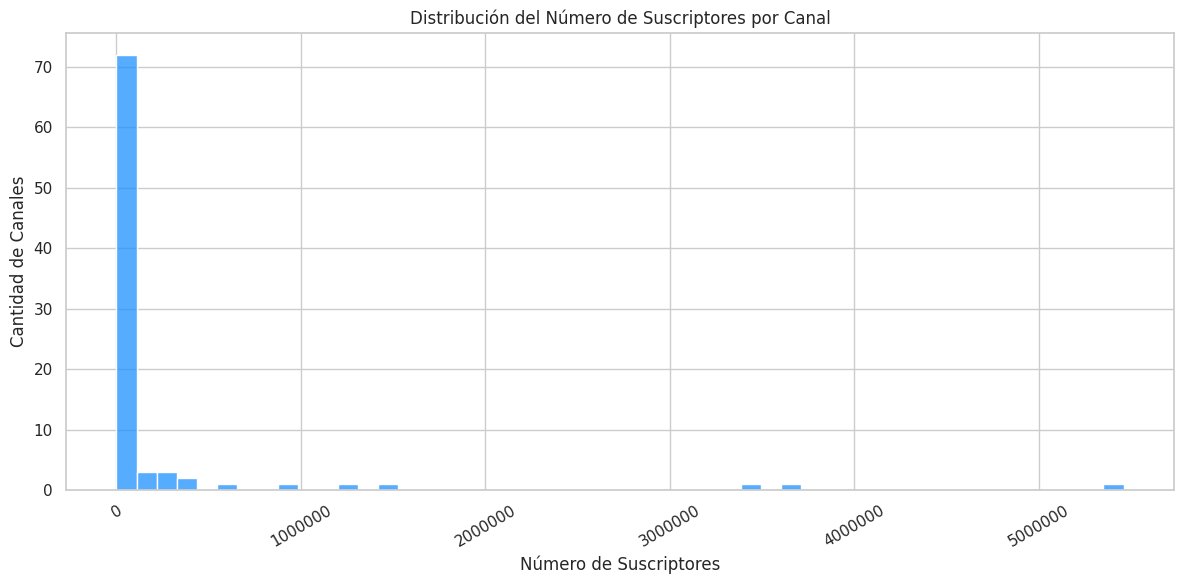

In [34]:
# 1. Distribución de Suscriptores (Histograma, posible escala log)
logging.info("Graficando: 1. Distribución de Suscriptores")
plt.figure(figsize=(12, 6))
# Filtrar NaN antes de graficar
data_to_plot = df_yt_stats['subscriber_count'].dropna()
if not data_to_plot.empty:
    sns.histplot(data_to_plot, bins=50, kde=False, color='dodgerblue', log_scale=(False, False)) # Probar con y sin log_scale=True
    plt.title('Distribución del Número de Suscriptores por Canal')
    plt.xlabel('Número de Suscriptores') # Añadir '(Escala Log)' si usas log_scale=True
    plt.ylabel('Cantidad de Canales')
    plt.ticklabel_format(style='plain', axis='x') # Evitar notación científica si son números grandes
    plt.xticks(rotation=30)
else:
    plt.text(0.5, 0.5, 'No hay datos de suscriptores válidos para graficar', ha='center', va='center')
    plt.title('Distribución del Número de Suscriptores por Canal')
plt.tight_layout()
plt.show()

2025-04-11 16:44:53,669 - INFO - Graficando: 2. Distribución de Vistas Totales del Canal


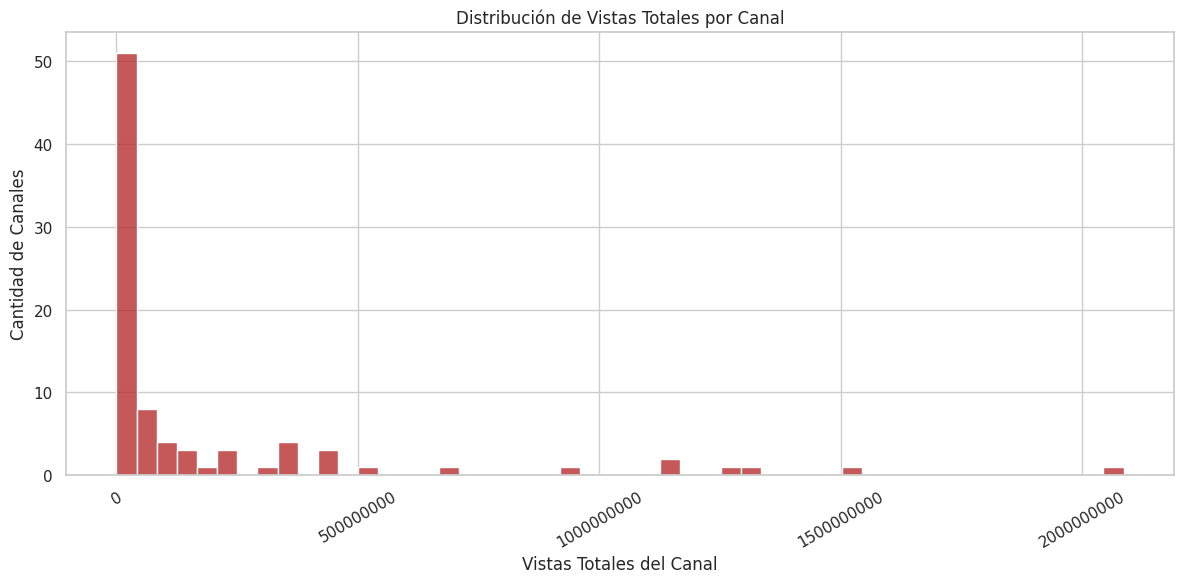

In [35]:
# 2. Distribución de Vistas Totales del Canal (Histograma, posible escala log)
logging.info("Graficando: 2. Distribución de Vistas Totales del Canal")
plt.figure(figsize=(12, 6))
data_to_plot = df_yt_stats['view_count'].dropna()
if not data_to_plot.empty:
    sns.histplot(data_to_plot, bins=50, kde=False, color='firebrick', log_scale=(False, False)) # Probar con y sin log_scale=True
    plt.title('Distribución de Vistas Totales por Canal')
    plt.xlabel('Vistas Totales del Canal') # Añadir '(Escala Log)' si usas log_scale=True
    plt.ylabel('Cantidad de Canales')
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation=30)
else:
    plt.text(0.5, 0.5, 'No hay datos de vistas válidos para graficar', ha='center', va='center')
    plt.title('Distribución de Vistas Totales del Canal')
plt.tight_layout()
plt.show()


2025-04-11 16:44:53,835 - INFO - Graficando: 3. Distribución del Número de Videos por Canal


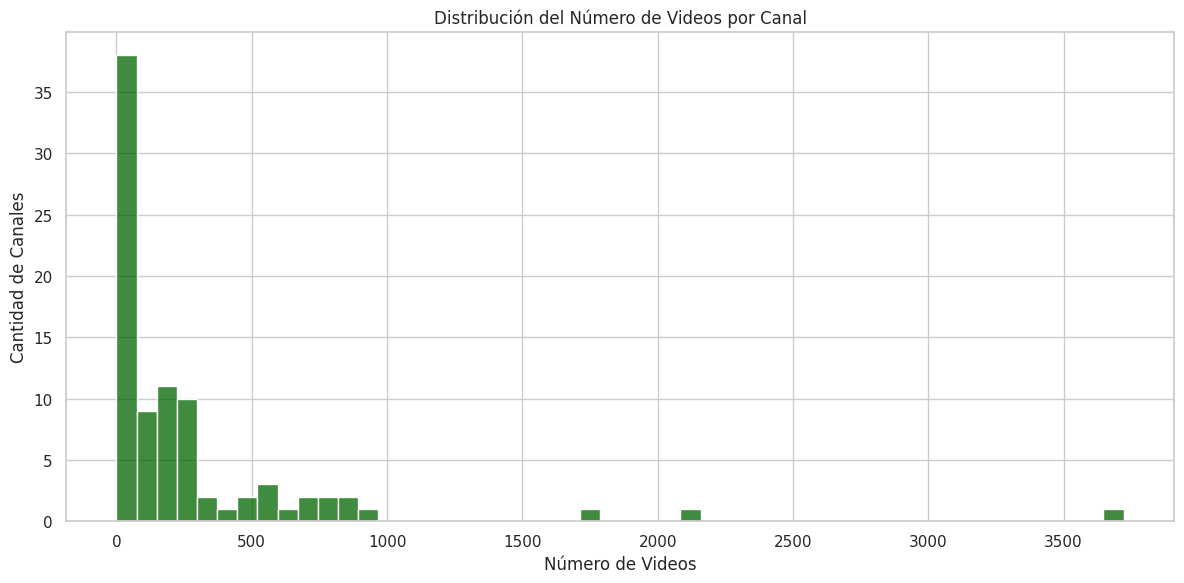

In [36]:
# 3. Distribución del Número de Videos (Histograma)
logging.info("Graficando: 3. Distribución del Número de Videos por Canal")
plt.figure(figsize=(12, 6))
data_to_plot = df_yt_stats['video_count'].dropna()
if not data_to_plot.empty:
    sns.histplot(data_to_plot, bins=50, kde=False, color='darkgreen')
    plt.title('Distribución del Número de Videos por Canal')
    plt.xlabel('Número de Videos')
    plt.ylabel('Cantidad de Canales')
    plt.ticklabel_format(style='plain', axis='x')
    # Considerar limitar el eje x si hay outliers muy grandes: plt.xlim(0, data_to_plot.quantile(0.99))
else:
    plt.text(0.5, 0.5, 'No hay datos de conteo de videos válidos para graficar', ha='center', va='center')
    plt.title('Distribución del Número de Videos por Canal')
plt.tight_layout()
plt.show()

2025-04-11 16:44:53,998 - INFO - Graficando: 4. Distribución de Likes Totales (Top 10 Videos)


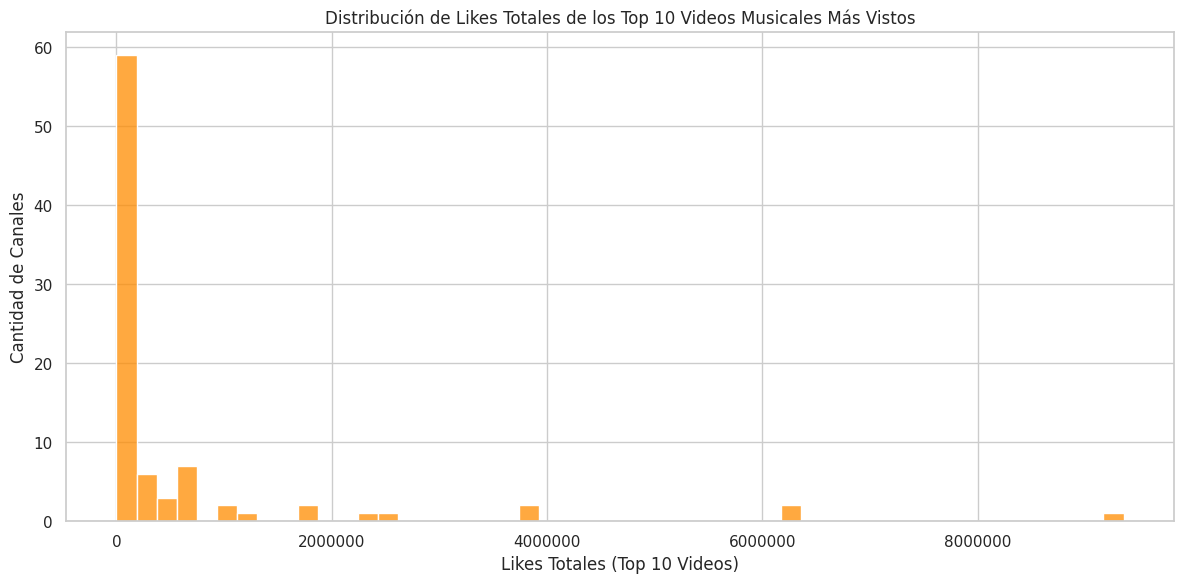

In [37]:
# 4. Distribución de Likes Totales de Top 10 Videos (Histograma)
logging.info("Graficando: 4. Distribución de Likes Totales (Top 10 Videos)")
plt.figure(figsize=(12, 6))
data_to_plot = df_yt_stats['total_top10_video_likes'].dropna()
if not data_to_plot.empty:
    sns.histplot(data_to_plot, bins=50, kde=False, color='darkorange')
    plt.title('Distribución de Likes Totales de los Top 10 Videos Musicales Más Vistos')
    plt.xlabel('Likes Totales (Top 10 Videos)')
    plt.ylabel('Cantidad de Canales')
    plt.ticklabel_format(style='plain', axis='x')
else:
        plt.text(0.5, 0.5, 'No hay datos de likes válidos para graficar', ha='center', va='center')
        plt.title('Distribución de Likes Totales (Top 10 Videos)')
plt.tight_layout()
plt.show()


2025-04-11 16:44:54,161 - INFO - Graficando: 5. Suscriptores vs. Vistas Totales


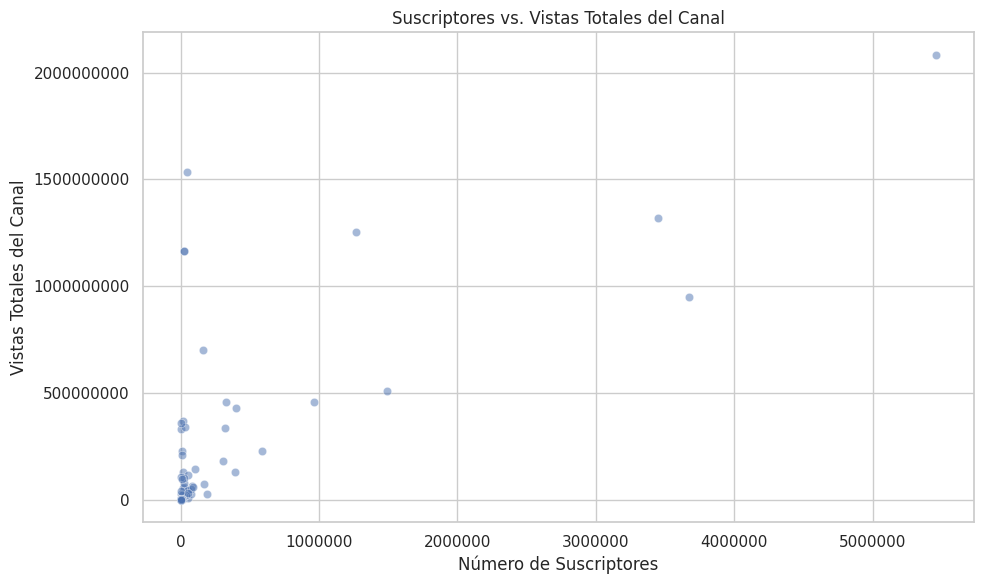

In [38]:
# 5. Scatter Plot: Suscriptores vs. Vistas Totales
logging.info("Graficando: 5. Suscriptores vs. Vistas Totales")
plt.figure(figsize=(10, 6))
# Filtrar NaNs en ambas columnas para el scatter plot
scatter_data = df_yt_stats.dropna(subset=['subscriber_count', 'view_count'])
if not scatter_data.empty:
    sns.scatterplot(data=scatter_data, x='subscriber_count', y='view_count', alpha=0.5)
    plt.title('Suscriptores vs. Vistas Totales del Canal')
    plt.xlabel('Número de Suscriptores')
    plt.ylabel('Vistas Totales del Canal')
    plt.ticklabel_format(style='plain', axis='both') # Evitar notación científica
    # Considerar escalas logarítmicas si los datos están muy agrupados:
    # plt.xscale('log')
    # plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'No hay suficientes datos válidos para el scatter plot', ha='center', va='center')
    plt.title('Suscriptores vs. Vistas Totales del Canal')
plt.tight_layout()
plt.show()


2025-04-11 16:44:54,285 - INFO - Graficando: 6. Suscriptores vs. Likes Top 10 Videos


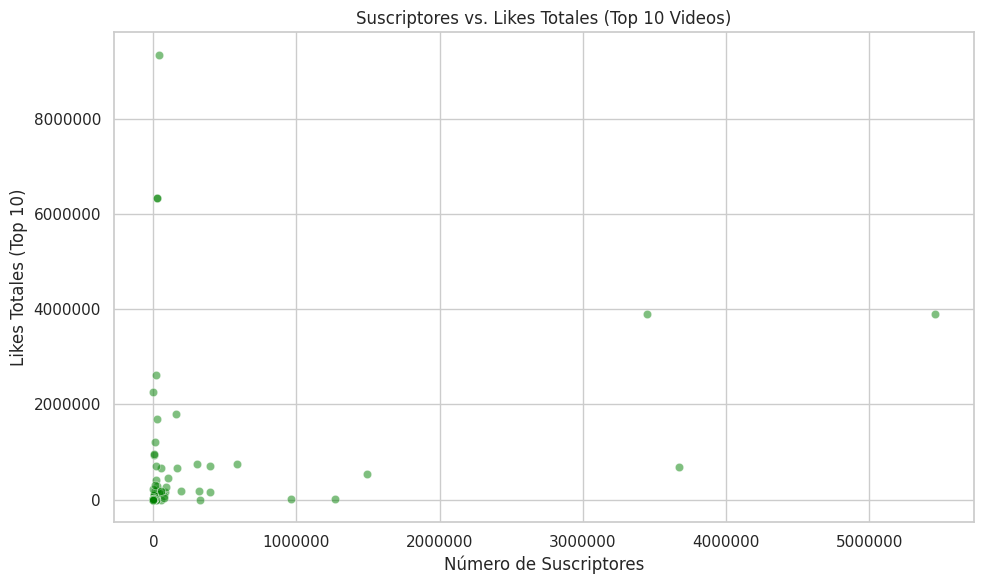

In [39]:
# 6. Scatter Plot: Suscriptores vs. Likes Top 10
logging.info("Graficando: 6. Suscriptores vs. Likes Top 10 Videos")
plt.figure(figsize=(10, 6))
scatter_data = df_yt_stats.dropna(subset=['subscriber_count', 'total_top10_video_likes'])
if not scatter_data.empty:
    sns.scatterplot(data=scatter_data, x='subscriber_count', y='total_top10_video_likes', alpha=0.5, color='green')
    plt.title('Suscriptores vs. Likes Totales (Top 10 Videos)')
    plt.xlabel('Número de Suscriptores')
    plt.ylabel('Likes Totales (Top 10)')
    plt.ticklabel_format(style='plain', axis='both')
    # plt.xscale('log')
    # plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'No hay suficientes datos válidos para el scatter plot', ha='center', va='center')
    plt.title('Suscriptores vs. Likes Totales (Top 10 Videos)')
plt.tight_layout()
plt.show()

2025-04-11 16:44:54,414 - INFO - Graficando: 7. Vistas Totales vs. Likes Top 10 Videos


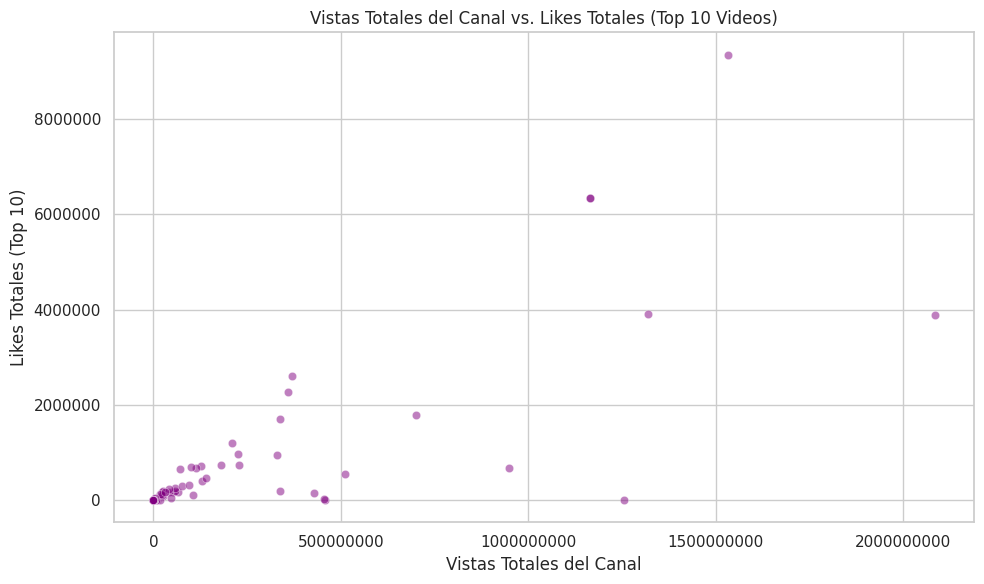

In [40]:
# 7. Scatter Plot: Vistas Totales vs. Likes Top 10
logging.info("Graficando: 7. Vistas Totales vs. Likes Top 10 Videos")
plt.figure(figsize=(10, 6))
scatter_data = df_yt_stats.dropna(subset=['view_count', 'total_top10_video_likes'])
if not scatter_data.empty:
    sns.scatterplot(data=scatter_data, x='view_count', y='total_top10_video_likes', alpha=0.5, color='purple')
    plt.title('Vistas Totales del Canal vs. Likes Totales (Top 10 Videos)')
    plt.xlabel('Vistas Totales del Canal')
    plt.ylabel('Likes Totales (Top 10)')
    plt.ticklabel_format(style='plain', axis='both')
    # plt.xscale('log')
    # plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'No hay suficientes datos válidos para el scatter plot', ha='center', va='center')
    plt.title('Vistas Totales del Canal vs. Likes Totales (Top 10 Videos)')
plt.tight_layout()
plt.show()

2025-04-11 16:44:54,531 - INFO - Graficando: 8. Top 10 Canales por Suscriptores


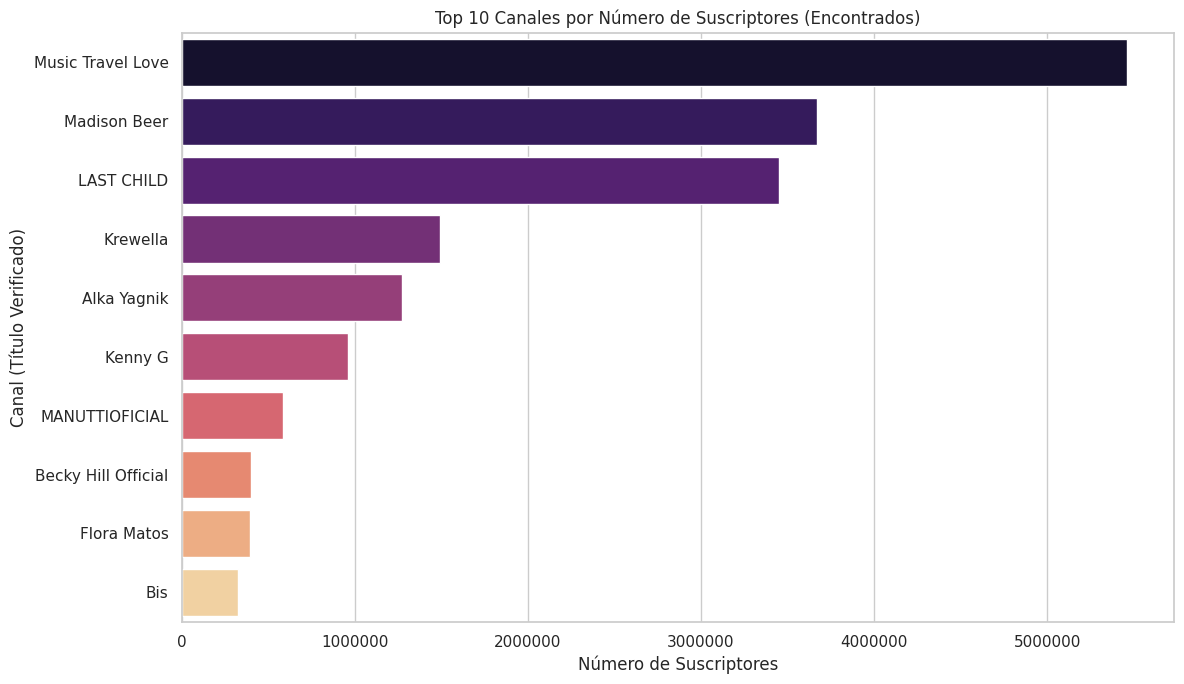

In [41]:
# 8. Top 10 Canales por Suscriptores (Bar Plot)
logging.info("Graficando: 8. Top 10 Canales por Suscriptores")
n_top_subs = 10
# Usar dropna() para suscriptores y título verificado
top_subs_channels = df_yt_stats.dropna(subset=['subscriber_count', 'channel_title_verified']).nlargest(n_top_subs, 'subscriber_count')

if not top_subs_channels.empty:
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(data=top_subs_channels, y='channel_title_verified', x='subscriber_count', palette='magma', orient='h',
                        hue='channel_title_verified', legend=False) # Añadir hue y legend
    plt.title(f'Top {n_top_subs} Canales por Número de Suscriptores (Encontrados)')
    plt.xlabel('Número de Suscriptores')
    plt.ylabel('Canal (Título Verificado)')
    plt.ticklabel_format(style='plain', axis='x')
    # Añadir etiquetas (opcional, pueden solaparse)
    # for i, v in enumerate(top_subs_channels['subscriber_count']):
    #     plt.text(v, i, f' {v:,.0f}', va='center')
else:
    plt.figure(figsize=(6, 4))
    plt.text(0.5, 0.5, 'No hay suficientes datos válidos para mostrar Top Canales', ha='center', va='center')
    plt.title(f'Top {n_top_subs} Canales por Suscriptores')
plt.tight_layout()
plt.show()

2025-04-11 16:44:54,716 - INFO - 
--- Matriz de Gráficas (2x2) - Resumen YouTube Stats ---


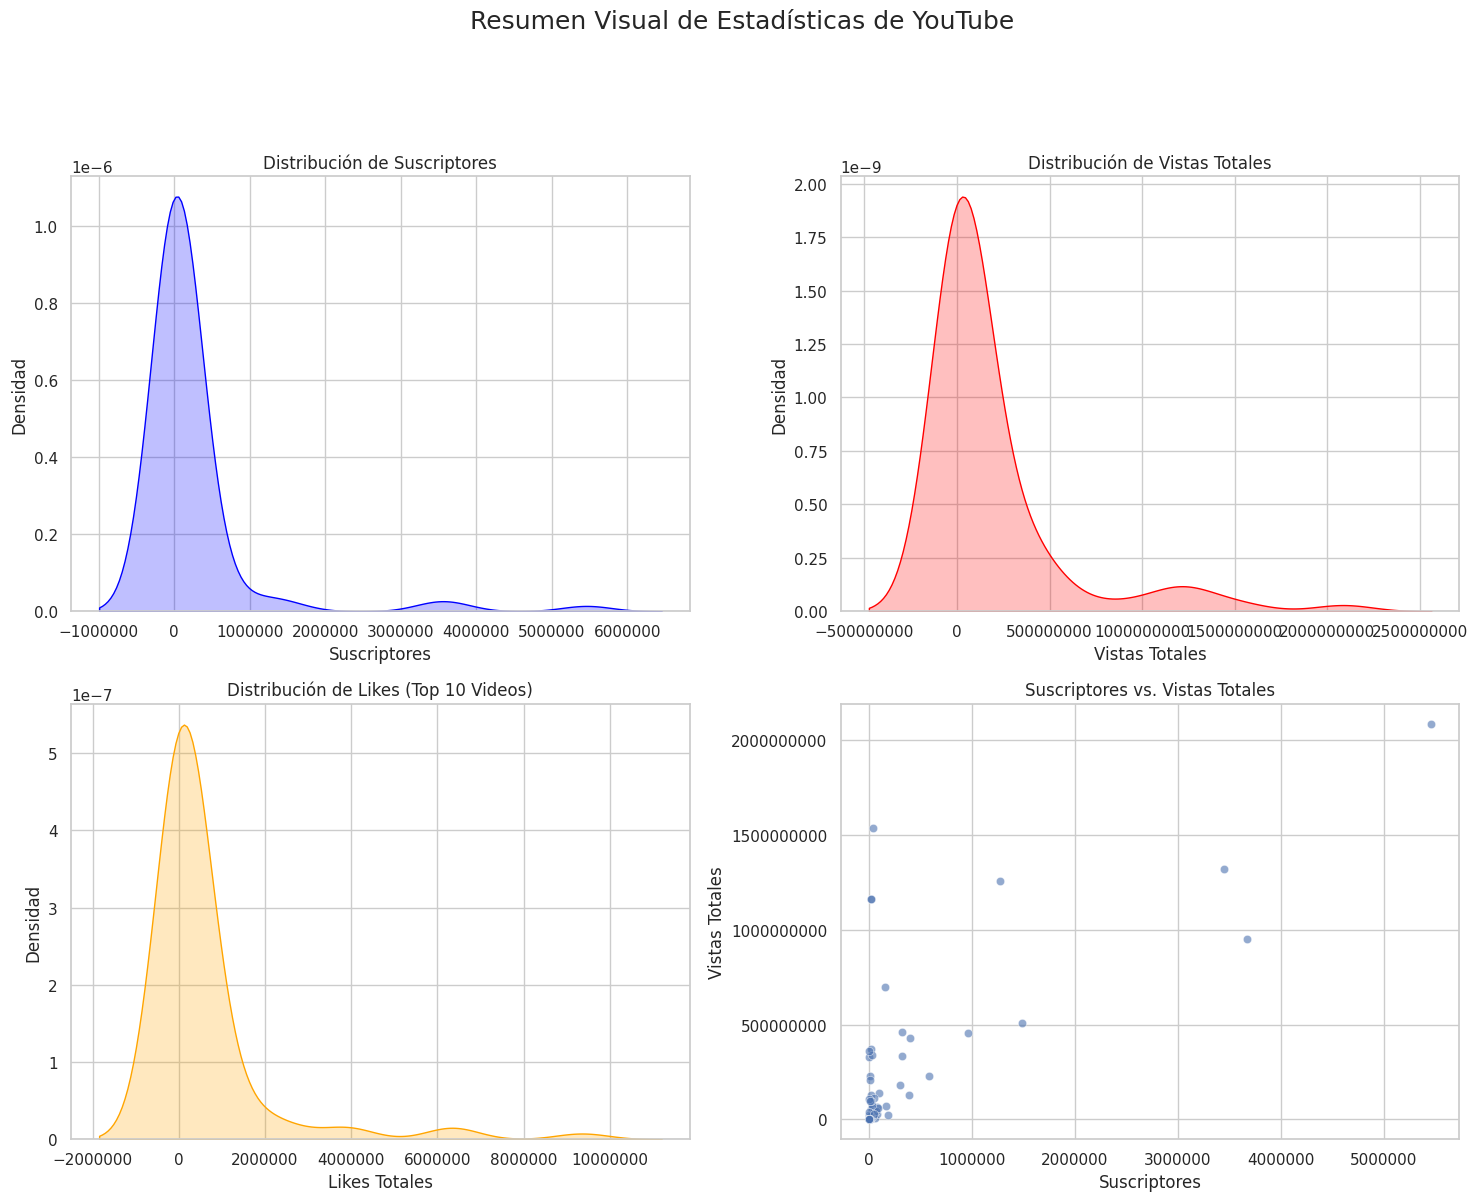

2025-04-11 16:44:55,344 - INFO - 
--- Fin del EDA Visual para YouTube Stats ---


In [42]:
# --- Matriz de Gráficas (2x2 = 4 Gráficos) ---
if df_yt_stats is not None:
    logging.info("\n--- Matriz de Gráficas (2x2) - Resumen YouTube Stats ---")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # Grid de 2x2
    fig.suptitle('Resumen Visual de Estadísticas de YouTube', fontsize=18, y=1.03)

    # 1. Distribución de Suscriptores (KDE)
    data_subs = df_yt_stats['subscriber_count'].dropna()
    if not data_subs.empty:
        sns.kdeplot(data=data_subs, ax=axes[0, 0], fill=True, color='blue', log_scale=False) # Probar log_scale=True
        axes[0, 0].set_title('Distribución de Suscriptores')
        axes[0, 0].set_xlabel('Suscriptores') # Añadir (Escala Log) si se usa
        axes[0, 0].set_ylabel('Densidad')
        axes[0, 0].ticklabel_format(style='plain', axis='x')
    else:
        axes[0, 0].text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        axes[0, 0].set_title('Distribución de Suscriptores')


    # 2. Distribución de Vistas Totales (KDE)
    data_views = df_yt_stats['view_count'].dropna()
    if not data_views.empty:
        sns.kdeplot(data=data_views, ax=axes[0, 1], fill=True, color='red', log_scale=False) # Probar log_scale=True
        axes[0, 1].set_title('Distribución de Vistas Totales')
        axes[0, 1].set_xlabel('Vistas Totales') # Añadir (Escala Log) si se usa
        axes[0, 1].set_ylabel('Densidad')
        axes[0, 1].ticklabel_format(style='plain', axis='x')
    else:
        axes[0, 1].text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        axes[0, 1].set_title('Distribución de Vistas Totales')


    # 3. Distribución de Likes Top 10 Videos (KDE)
    data_likes = df_yt_stats['total_top10_video_likes'].dropna()
    if not data_likes.empty:
        sns.kdeplot(data=data_likes, ax=axes[1, 0], fill=True, color='orange', log_scale=False) # Probar log_scale=True
        axes[1, 0].set_title('Distribución de Likes (Top 10 Videos)')
        axes[1, 0].set_xlabel('Likes Totales') # Añadir (Escala Log) si se usa
        axes[1, 0].set_ylabel('Densidad')
        axes[1, 0].ticklabel_format(style='plain', axis='x')
    else:
        axes[1, 0].text(0.5, 0.5, 'Sin datos', ha='center', va='center')
        axes[1, 0].set_title('Distribución de Likes (Top 10 Videos)')


    # 4. Scatter Plot: Suscriptores vs Vistas Totales
    scatter_data_matrix = df_yt_stats.dropna(subset=['subscriber_count', 'view_count'])
    if not scatter_data_matrix.empty:
        sns.scatterplot(data=scatter_data_matrix, x='subscriber_count', y='view_count', ax=axes[1, 1], alpha=0.6)
        axes[1, 1].set_title('Suscriptores vs. Vistas Totales')
        axes[1, 1].set_xlabel('Suscriptores')
        axes[1, 1].set_ylabel('Vistas Totales')
        axes[1, 1].ticklabel_format(style='plain', axis='both')
        # axes[1, 1].set_xscale('log') # Descomentar para escala log
        # axes[1, 1].set_yscale('log') # Descomentar para escala log
    else:
        axes[1, 1].text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center')
        axes[1, 1].set_title('Suscriptores vs. Vistas Totales')

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Ajustar rect para el título
    plt.show()

else:
    logging.warning("DataFrame df_yt_stats no disponible para la Matriz de Gráficas.")

logging.info("\n--- Fin del EDA Visual para YouTube Stats ---")